# A Lesson in Color Map Normalization with Python Plotting Library, Matplotlib
**By AJ Caesar**

We will be using data from sip_data (https://drive.google.com/drive/folders/1MKGDVy0HBjbodsuqpOVOdn9JDY7P8q42?usp=sharing), specifically file keck_hst_data.txt. Once you access this folder, from the dropdown menu select "add shortcut to drive" in order to mount it to your personal drive (VERY IMPORTANT, CODE WILL NOT WORK UNLESS YOU COMPLETE THIS STEP). This data inclues the position and velocities of numerous stars relative to the center of the Andromeda Galaxy. For our purposes, we want our to graph the relative positions of stars within the galaxy as well as their radial velocities. The purpose of this notebook is to build upon the concept of colormapping and dive more in depth into colormap normalization. In my notebook, we will explore how to use the RdBu_r color map and normalize it to most accurately represent the red and blueshifting of stars relative to the center of the Andromeda Galaxy.

# A brief explanation on red and blueshifting (Doppler Effect)
Red and blueshifting are changes in the frequency of light that occurs when one cellestial body moves towards (blueshift) or away from (redshift) another cellestial body (colorshifts can also be caused by the universe's expansion and a phenomenon called "gravitational redshift" but for the purpose of this notebook we are attributing colorshifts to each star's velocity relative the center of the Andromeda). Because the speed of light is a universal constant, when one cellestial body moves towards another the light it emits cannot increase in speed. Therefore, to compensate for their large initial velocity the light waves "compress" or "smush" and decrease in wavelength while increasing in frequency. On the other hand, the light waves emitted by a cellestial body moving away from another must "expand" and decrease in frequency to satisfy the constant speed of light. On the visible light spectrum, the median wavelength is about 550 nanometers and green in color, while a shorter wavelength such as 450 nanometers is blue in color, and a longer wavelength such as 650 nanometers is red in color. Therefore, stars with a negative velocity, moving towards the center of the Andromeda (in astronomy negative velocity denotes two objects moving closer one another and positive velocity denotes two objects moving further one another) will see the frequency of their emitted light waves decrease and blueshift, while stars with a positive velocity, moving away from the Center of the Andromeda, will redshift. For a more extensive explanation on redshifting and blueshifting, visit this link: https://www.scienceabc.com/nature/universe/doppler-effect-distant-galaxies-redshift-blueshift.html


Let us first mount to google drive in order to upload data from sip_data. We also need to import numpy, matplotlib, and matplotlib.colors (this last step is technically unecessary, but it will shorten our code down the road).

In [ ]:
#Mount to Google Drive. The data file we want is located within the sip_data folder
from google.colab import drive
drive.mount('/content/drive')
from os import path as path
catalog_folder = '/content/drive/MyDrive/sip_data'
#change this if the path to sip_data is different for you

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib.colors. This will come in handy later on when we modify our colormap
import matplotlib.colors as colors


Mounted at /content/drive


# Now let's create a scatterplot to visualize the data

The data here has three variables we want to graph - eta, xi, and v, so with a two dimensional plot this seems impossible except for using parametrics. However, using a colormap we can demonstrate variability in v on the two dimensional graph.

/content/drive/MyDrive/sip_data/keck_hst_data.txt


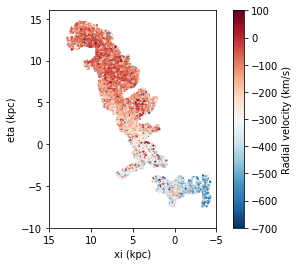

In [ ]:
#take Radial velocity data from the folder keck_hst_data.txt
keck_hst_data = path.join(catalog_folder, 'keck_hst_data.txt')
print(keck_hst_data)
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt(keck_hst_data, unpack = True)

#this is a conversion factor for degrees to kiloparsecs
#kiloparsec is a unit of measurement (1000 parsecs) used to define the positions of orbiting bodies,
#in this case, we are defining the positions of starts orbiting the center of the Andromeda
deg2kpc = 13.67
xi *= deg2kpc
eta *= deg2kpc

#Now lets plot it
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 16)
cc = ax.scatter(xi, eta, c = v, s = 5, edgecolors = 'none', vmin = -700, vmax = 100,
                cmap='RdBu_r')
#make sure to use the RdBu_r colormap. This was not detailed explicitly in notebook 4.
#RdBu_r causes the data to go from blue to red as the Radial Velocity increases
#which is consistent with Doppler Shifting/Redshift/Blueshift

plt.colorbar(cc, label = 'Radial velocity (km/s)')

This graph represents the Andromeda galaxy and the radial velocities of the stars within it. Do you see any problems here? Let me help you out. As explained above the Doppler Shift causes the spectral wavelength of objects moving positively, or away from an object, to increase - this is called reshifting. The spectral wavelength of objects moving negatively, or towards an object, decreases - this is called blueshifting. Therefore, the stars with radial velocities of 0 to 100 km/s redshift with regards to the center of the Andromeda Galaxy, and the stars with radial velocities of -700 to 0 km/s with regards to the center of the Andromedia Galaxy blueshift. However, this is not what the above graph demonstrates. The RdBu_r colormap codes for a change from red to blue as the graph changes from positive to negative, but matplotlib automatically centers the colormap at the center of the graph as opposed to where Radial Velocity = 0. This means that stars with radial velocities in the range of 0 to -300 km/s are portrayed as red on the scatterplot even though they blueshift. Therefore, we need to fix both the center and the boundaries of our colormap in order to more accurately portray the red and blue shifting of stars within the Andromeda.

# Colormap Normalization


STEP 1: USE TWO SLOPE NORMALIZATION TO CHANGE THE CENTER OF THE COLORMAP

Matplotlib by default maps colors on a colormap from the graphs min to max with the center of the range being the center of the colormap. Therefore, we need to include a process called Colormap Normalization  in our code which can help us manipulate the center of the colormap using the command matplotlib.colors.TwoSlopeNorm. Remember we already imported matplotlib.colors as colors.

/content/drive/MyDrive/sip_data/keck_hst_data.txt


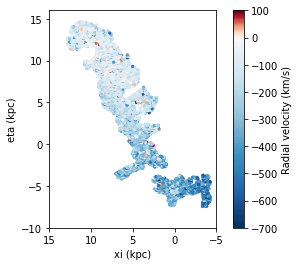

In [ ]:
#take Radial velocity data from the folder keck_hst_data.txt
keck_hst_data = path.join(catalog_folder, 'keck_hst_data.txt')
print(keck_hst_data)
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt(keck_hst_data, unpack = True)

#this is a conversion factor for degrees to kiloparsecs
deg2kpc = 13.67
xi *= deg2kpc
eta *= deg2kpc

norm = colors.TwoSlopeNorm(vmin=-700, vcenter=0, vmax=100)
#defining our normalization before helps keep our code concise

#Now lets plot it
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 16)
cc = ax.scatter(xi, eta, c = v, s = 5,
                cmap='RdBu_r', norm=norm)
#notice how we took out vmin and vmax as parameters within the ax.scatter()
#because vmin and vmax are now already defined agove within colors.TwoSlopeNorm
#the graphs normalization is included as a parameter with the code norm

plt.colorbar(cc, label = 'Radial velocity (km/s)')


This graph's colormap looks a lot more accurate than the previous. As you can see, using the command matplotlib.colors.TwoSlopeNorm we can set the minimum, maximum, and center of our colormap. Using this new colormap, we can see that most of the stars are blueshifted and there is an overall trend that they become more blueshifted as eta and xi decrease. Additionally, you will notice that vmin and vmax were removed as parameters from the ax.scatter() function because they are now defined within the normalization, or norm, of the plot. By including norm as a paremeter, it further instructs the colormap RdBu_r on how to properly distribute itself across the data points. Now, we have successfully shifted the center of the colormap. As we can see, the colorbar demonstrates an accurate center. However, scientifically it does not make sense that the same shade of red would be present where Radial Velocity = 100 km/s as of blue where Radial Velocity = -700 km/s. Now, the same range of color tones of red has been consolidated into a small range of 100 km/s which creates an inaccurate depiction. Let's look at changing the bounds of the graph in order to repair this inaccuracy.

STEP 2 - USE BOUNDS NORMALIZATION TO INCREASE ACCURACY OF COLOR TONES

Now it is time to ensure that not only is the center of our colormap accurate but the tones are as well. We can do this by swapping our normalization from matplotlib.colors.TwoSlopeNorm for matplotlib.colors.BoundaryNorm which allows us greater control over the colormaps boundaries than previously which only allowed us to determine min, max, and center.

/content/drive/MyDrive/sip_data/keck_hst_data.txt


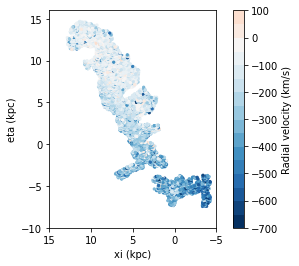

In [ ]:
#take Radial velocity data from the folder keck_hst_data.txt
keck_hst_data = path.join(catalog_folder, 'keck_hst_data.txt')
print(keck_hst_data)
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt(keck_hst_data, unpack = True)

#this is a conversion factor for degrees to kiloparsecs
deg2kpc = 13.67
xi *= deg2kpc
eta *= deg2kpc

bounds = np.arange(start= -700, stop=150, step=50)
#bounds = np.array([ -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50, 100])
#these two controls create the same array, but using np.arange is much more concise
#these bounds represent each boundary where the tone of the color changes
#as the number of bounds decreases, the number of tones used decreases, and vice versa
#eventually, as the number of bounds approaches infinity the individual steps are impossible to see and the colormap
#appears as a uniform spectrum
#input step = 500 and step = 5 and see how the graph changes

norm = colors.BoundaryNorm(boundaries=bounds, ncolors=150)
#defining our normalization before helps keep our code concise
#boundary normalization allows you to input the number
#ncolors stands for the number of colors used
#toggling ncolors changes the centerpoint of the colormap - try it out!

#Now lets plot it
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 16)
cc = ax.scatter(xi, eta, c = v, s = 5,
                cmap='RdBu_r', norm=norm)
#notice how we took out vmin and vmax as parameters within the ax.scatter()
#because vmin and vmax are now already defined agove within the array, bounds
#the graphs normalization is included as a parameter, norm

plt.colorbar(cc, label = 'Radial velocity (km/s)')

This plot looks the most accurate out of these 3. As we see, there is a break between redshifted and blueshifted stars where Radial Velocity = 0 km/s, and the tones of blue and red on the graph make sense in conjunction with the magnitude of radial velocity. The shade of red where Radial Velocity = 100 km/s is similar in strength to that of blue where Radial Velocity = -100 km/s. This makes sense, becuase the magnitude of the Doppler Shift for objects with the same speed is equal.

# One More Example of colormap normalization
lets use this NJ maximum temperature data (https://drive.google.com/drive/folders/1Nb6Rf0gco6QzuWy_eryWiir33LPtzsSs?usp=sharing) sourced from the National Oceanic and Atmospheric Adminstration (https://www.ncdc.noaa.gov/cag/statewide/time-series/28/tmax/3/8/1895-2022?base_prd=true&begbaseyear=1901&endbaseyear=2000)
to spot a trend in the NJ temperature anomolies from the past 100 years. This will tell us how much the temperature each year deviates from the average. **Make sure to "add shortcut to drive" for this file as you did for prior files**

/content/drive/MyDrive/NJClimateData/NJ_Max_Temp-4.txt


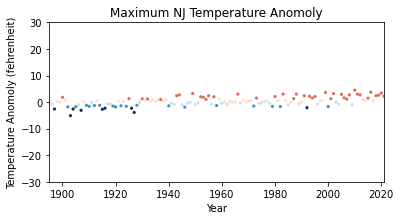

In [ ]:
#first lets define our path to this data found in the shared folder linked above
#change this path if it does not match yours
NJtemp = '/content/drive/MyDrive/NJClimateData'

#take data from NJ_Max_Temp-4.txt
NJ_Max_Temp = path.join(NJtemp, 'NJ_Max_Temp-4.txt')
print(NJ_Max_Temp)
Date, Temperature, Anomoly = np.loadtxt(NJ_Max_Temp, encoding='utf-8-sig', unpack = True)
#convert the data to floats so cmap applies

#defining our normalization before helps keep our code concise
bounds = np.arange(start= -3, stop=3, step=1)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=200)
#the range of our colormap should be -3 to 3 as this is the range of the anomoly values
#ncolors helps us position the center of the colormap at t=0 degrees fehrenheit

#Now lets plot it
ax = plt.axes(aspect = 'equal')
ax.set_title('Maximum NJ Temperature Anomoly')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomoly (fehrenheit)')
ax.set_xlim(1895, 2021)
ax.set_ylim(-30, 30)
cc = ax.scatter(Date, Anomoly, c=Anomoly, s = 10, edgecolors = 'none',
                cmap='RdBu_r', norm=norm )


Here, the benefit of colormap normalization is that it allows us to set thin borders, from just Temperature = -3 to Temperature = 3, rather than having the colormap span the entire distance of the vertical axis which allows us to see much greater contrast within a small range of numbers. Without the colormap, it would have been difficult to see the upward trend in the temperature anomoly of the maximum NJ temperature annually. However, with the colormap it is easier to see that during the first half of the 19th century, the maximimum NJ temperature was often less than the average over the last 125 years, because most of these points are blue. The more recent red points signify a concerning trend in which the maximum NJ temperature repeatedly exceeds the average from the last 125 years. The inclusion of a colormap also makes it easier for ordinary citizens to see these trends within the data which may encourage them to do their part in the fight against global warming.  

# Final Thoughts

In total, colormap normalization is the process by which the programmer can gain greater control over how matplotlib applies the colormap of their choice to represent their data. It is a useful tool for most accurately coloring data in a situation like the one shown in the scatterplot of stars within the Andromeda galaxy where the dimensions of a graph are not perfectly symmetrical. Color is an extremely useful tool when it comes to displaying graphs, and it is important that its shade, location, and identity accurately represent the numbers your data portray. Normalization is inputted into the graph using norm= as a parameter of the graph, and Boundary Normalization and Two Step Normalization are just two of many ways to normalize color maps. I recommend exploring more with the link below. Thank you

To learn more about colormap normalization, visit the link below.
https://matplotlib.org/stable/tutorials/colors/colormapnorms.html